# Preprocessing the Ameriflux data
In this notebook the Ameriflux data is prepared for further analysis.

The resulting data is an xarray `Dataset`, containing the required data for all sites, with the time set to UTC.

To be able to run this notebook you need:
- A folder containing Ameriflux site .zip files (e.g., `AMF_US-xBR_FLUXNET_FULLSET_2017-2021_3-5.zip`)
- The metadata file `AMF_AA-Flx_FLUXNET-BIF_CCBY4_20221210.xlsx`
- And the netCDF file describing the transcom regions.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from src import process_fluxnet

Read and preprocess all sites:

In [2]:
ds = process_fluxnet.preprocess_ameriflux_sites(
    zip_folder=Path("/home/bart/Data/EXCITED/fluxnet/zips"),
    metadata_file=Path("/home/bart/Data/EXCITED/fluxnet/AMF_AA-Flx_FLUXNET-BIF_CCBY4_20221210.xlsx"),
    transcom_regions_file=Path("/home/bart/Data/EXCITED/regions.nc"),
)

Found 81 Ameriflux sites.
Failed to read property. site='US-Me1', prop='LOCATION_LAT'
Failed to read property. site='US-Me1', prop='LOCATION_LONG'
Failed to read property. site='US-Me3', prop='LOCATION_LAT'
Failed to read property. site='US-Me3', prop='LOCATION_LONG'
Of which 61 are located within transcom region 2.
Starting to load the .csv files...
.csv files loaded. Merging them and creating the dataset.


The resulting `xr.Dataset` contains the data for all Ameriflux sites:

In [3]:
ds

<xarray.Dataset>
Dimensions:         (time: 271755, site: 61)
Coordinates:
  * time            (time) datetime64[ns] 1991-01-01T06:00:00 ... 2022-01-01T...
  * site            (site) <U6 'US-Rws' 'US-ARM' 'US-CS4' ... 'US-UMd' 'US-KLS'
Data variables:
    GPP_NT_VUT_REF  (site, time) float64 nan nan nan nan nan ... nan nan nan nan
    GPP_DT_VUT_REF  (site, time) float64 nan nan nan nan nan ... nan nan nan nan
    NEE_VUT_REF     (site, time) float64 nan nan nan nan nan ... nan nan nan nan
    latitude        (site) float64 43.17 36.61 44.16 38.12 ... 40.02 45.56 38.77
    longitude       (site) float64 -116.7 -97.49 -89.55 ... -83.02 -84.7 -97.57

Let's save the dataset so we don't have to recompute it later!

In [5]:
ds.to_netcdf("/home/bart/Data/EXCITED/NEE_ameriflux_transcom2.nc")

And we can plot the NEE for a site (here grouped by DOY):

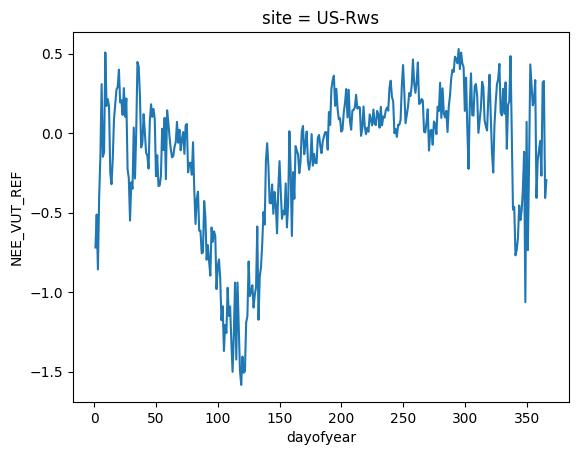

In [6]:
ds.isel(site=0)["NEE_VUT_REF"].groupby(ds.time.dt.dayofyear).mean().plot()

We can also easily compare the GPP to the NEE:

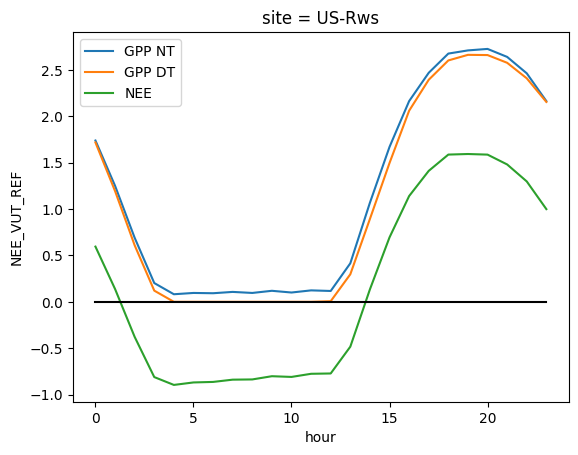

In [7]:
ds_site = ds.isel(site=0)
ds_site["GPP_NT_VUT_REF"].groupby(ds_site.time.dt.hour).mean().plot(label="GPP NT")
ds_site["GPP_DT_VUT_REF"].groupby(ds_site.time.dt.hour).mean().plot(label="GPP DT")
(-ds_site["NEE_VUT_REF"].groupby(ds_site.time.dt.hour).mean()).plot(label="NEE")
plt.legend()
plt.plot([0,23],[0,0],'k')

Or look at the yearly pattern of respiration:

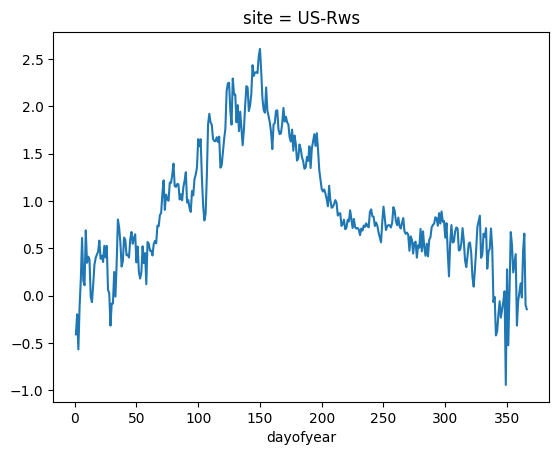

In [8]:
(ds_site["GPP_DT_VUT_REF"].groupby(ds_site.time.dt.dayofyear).mean()--ds_site["NEE_VUT_REF"].groupby(ds_site.time.dt.dayofyear).mean()).plot()